## Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Reading data provided by Karan for 2009-2010 with the filled API data

In [2]:

df_2009_2010 = pd.read_csv('Resources/uber_&_weather_2009_2010.csv')
df_2009_2010


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,date,time,Distance (km),Distance (miles),Time Interval,fare_amount_group,Year,Month,Timestamp,Clouds,Dew Point,Feels Like,Humidity,Pressure,Sunrise,Sunset,Temp,Visibility,Weather Description,Weather Icon,Weather ID,Weather Main,Wind Degree,Wind Speed,Data Rain,Data Snow
0,2009-03-27 17:46:27,-73.991982,40.754068,-73.985752,40.761649,1,6.7,2009-03-27,17:46:27,0.992324,0.616603,5 pm - 8 pm,0 to 100,2009,March,1238175987,0,40.98,58.80,48,1016,1238150826,1238195707,60.76,10000,clear sky,01d,800,Clear,130,6.93,Data not found,Data not found
1,2009-08-27 22:33:52,-73.997259,40.721079,-73.995489,40.732665,1,5.7,2009-08-27,22:33:52,1.296095,0.805358,8 pm - 11 pm,0 to 100,2009,Aug,1251412432,0,59.50,73.72,61,1019,1251368315,1251416200,73.78,10000,clear sky,01d,800,Clear,240,9.17,Data not found,Data not found
2,2009-07-08 18:58:00,-73.987873,40.762978,-73.982817,40.771875,1,6.9,2009-07-08,18:58:00,1.076364,0.668823,5 pm - 8 pm,0 to 100,2009,Jul,1247079480,20,51.40,74.70,43,1013,1247045547,1247099358,75.43,10000,few clouds,02d,801,Clouds,320,11.41,Data not found,Data not found
3,2009-11-05 23:39:00,-73.998508,40.734732,-73.952335,40.778062,5,11.7,2009-11-05,23:39:00,6.187970,3.845036,11pm - 12 am,0 to 100,2009,Nov,1257464340,100,37.08,42.98,63,1017,1257420685,1257457666,49.10,10000,light rain,10n,500,Rain,270,17.22,Data not found,Data not found
4,2010-01-06 12:44:28,-73.976158,40.788235,-73.955486,40.764507,1,10.5,2010-01-06,12:44:28,3.158908,1.962859,10 am - 1 pm,0 to 100,2010,Jan,1262781868,100,15.57,15.12,58,1007,1262780410,1262814183,26.94,10000,overcast clouds,04d,804,Clouds,310,14.99,Data not found,Data not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2010-06-24 16:19:00,-73.952992,40.770903,-73.978287,40.755710,5,9.3,2010-06-24,16:19:00,2.717198,1.688393,1 pm - 5 pm,0 to 100,2010,Jun,1277396340,0,69.21,92.43,54,1007,1277371521,1277425862,87.93,10000,clear sky,01d,800,Clear,230,19.46,Data not found,Data not found
979,2009-09-04 15:01:10,-73.992113,40.749185,-73.959993,40.762195,1,13.3,2009-09-04,15:01:10,3.066032,1.905149,1 pm - 5 pm,0 to 100,2009,Sep,1252076470,0,57.43,73.87,56,1017,1252059980,1252106631,74.12,10000,clear sky,01d,800,Clear,350,10.29,Data not found,Data not found
980,2009-06-25 15:01:08,-73.986970,40.761084,-73.969959,40.784980,1,8.1,2009-06-25,15:01:08,3.016749,1.874526,1 pm - 5 pm,0 to 100,2009,Jun,1245942068,40,62.76,73.85,69,1011,1245921954,1245976275,73.54,10000,scattered clouds,03d,802,Clouds,70,8.05,Data not found,Data not found
981,2010-06-09 14:46:34,-74.002181,40.728612,-74.011305,40.708356,1,8.1,2010-06-09,14:46:34,2.378511,1.477942,1 pm - 5 pm,0 to 100,2010,Jun,1276094794,20,48.47,65.43,52,1021,1276075484,1276129564,66.61,10000,few clouds,02d,801,Clouds,170,6.93,Data not found,Data not found


## Reading data provided by Fahmida for 2011-2012 with the filled API data

In [3]:
df_2011_2012 = pd.read_csv('Resources/uber_&_weather_2011_2012.csv')
df_2011_2012

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,date,time,Distance (km),Distance (miles),Time Interval,fare_amount_group,Year,Month,Timestamp,Clouds,Dew Point,Feels Like,Humidity,Pressure,Sunrise,Sunset,Temp,Visibility,Weather Description,Weather Icon,Weather ID,Weather Main,Wind Degree,Wind Speed,Data Rain,Data Snow
0,2012-01-31 07:53:52,-73.957249,40.783054,-73.975848,40.755164,1,10.5,2012-01-31,07:53:52,3.472130,2.157487,7 am - 10 am,0 to 100,2012,Jan,1327996432,100,19.71,25.93,53,1025,1328011641,1328047857,33.44,10000,overcast clouds,04n,804,Clouds,200,9.17,Data not found,Data not found
1,2011-01-26 01:14:51,-73.993449,40.727387,-73.980559,40.746704,1,6.1,2011-01-26,01:14:51,2.405388,1.494643,12 am- 4 am,0 to 100,2011,Jan,1296004491,100,26.65,26.42,78,1021,1295957528,1295993047,32.04,10000,mist,50n,701,Mist,200,5.82,Data not found,Data not found
2,2012-03-12 08:00:08,-73.981595,40.740777,-73.955755,40.785052,0,12.9,2012-03-12,08:00:08,5.379335,3.342572,7 am - 10 am,0 to 100,2012,March,1331539208,0,32.81,42.01,56,1026,1331550701,1331593171,47.71,10000,clear sky,01n,800,Clear,250,13.87,Data not found,Data not found
3,2012-07-08 22:57:00,-73.989022,40.738055,-73.976835,40.785132,1,11.7,2012-07-08,22:57:00,5.331055,3.312573,8 pm - 11 pm,0 to 100,2012,Jul,1341788220,40,66.43,87.37,54,1012,1341739961,1341793748,84.92,10000,scattered clouds,03d,802,Clouds,180,11.50,Data not found,Data not found
4,2011-04-15 21:39:00,-74.009607,40.704450,-73.988825,40.730917,1,8.9,2011-04-15,21:39:00,3.422595,2.126707,8 pm - 11 pm,0 to 100,2011,Apr,1302903540,100,32.29,43.48,53,1031,1302862641,1302910465,48.63,10000,overcast clouds,04d,804,Clouds,150,12.75,Data not found,Data not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,2011-01-01 18:02:57,-73.966351,40.762081,-73.955443,40.773466,2,4.5,2011-01-01,18:02:57,1.563146,0.971296,5 pm - 8 pm,0 to 100,2011,Jan,1293904977,0,35.87,43.38,59,1019,1293884400,1293917907,49.59,9656,haze,50d,721,Haze,260,18.34,Data not found,Data not found
966,2011-11-18 22:32:56,-73.991900,40.769700,-73.955700,40.776200,3,10.1,2011-11-18,22:32:56,3.130887,1.945448,8 pm - 11 pm,0 to 100,2011,Nov,1321655576,0,21.83,37.94,40,1030,1321616782,1321652169,43.20,10000,clear sky,01n,800,Clear,240,9.17,Data not found,Data not found
967,2012-03-11 13:51:52,-73.979484,40.749402,-74.009457,40.713829,1,11.3,2012-03-11,13:51:52,4.690096,2.914298,1 pm - 5 pm,0 to 100,2012,March,1331473912,0,20.68,33.28,41,1034,1331464399,1331506705,41.13,10000,clear sky,01d,800,Clear,230,14.99,Data not found,Data not found
968,2011-05-19 02:15:24,-73.982342,40.727718,-74.005753,40.740153,4,6.5,2011-05-19,02:15:24,2.407402,1.495894,12 am- 4 am,0 to 100,2011,May,1305771324,100,55.49,56.50,96,1017,1305711383,1305763714,56.62,4828,moderate rain,10n,501,Rain,50,14.99,Data not found,Data not found


## Reading data provided by Kevin for 2013-2014 with the filled API data

In [4]:
df_2013_2014 = pd.read_csv('Resources/uber_&_weather_2013_2014.csv')
df_2013_2014


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,date,time,Distance (km),Distance (miles),Time Interval,fare_amount_group,Year,Month,Timestamp,Clouds,Dew Point,Feels Like,Humidity,Pressure,Sunrise,Sunset,Temp,Visibility,Weather Description,Weather Icon,Weather ID,Weather Main,Wind Degree,Wind Speed,Data Rain,Data Snow
0,2013-03-15 10:27:56,-73.988791,40.749692,-73.971666,40.759037,1,9.5,2013-03-15,10:27:56,1.776659,1.103967,10 am - 1 pm,0 to 100,2013,March,1363343276,0,13.19,18.72,44,1017,1363345631,1363388549,30.38,10000,clear sky,01n,800,Clear,300,17.25,Data not found,Data not found
1,2013-08-23 11:16:23,-73.979252,40.761998,-73.987618,40.752449,1,7.5,2013-08-23,11:16:23,1.273545,0.791346,10 am - 1 pm,0 to 100,2013,Aug,1377256583,0,64.69,72.12,79,1014,1377252869,1377301370,71.55,9656,haze,50d,721,Haze,350,5.82,Data not found,Data not found
2,2014-03-28 22:20:00,-73.982625,40.774777,-73.966365,40.800745,1,8.0,2014-03-28,22:20:00,3.193562,1.984393,8 pm - 11 pm,0 to 100,2014,March,1396045200,100,47.91,59.27,63,1015,1396003551,1396048551,60.55,10000,overcast clouds,04d,804,Clouds,230,9.22,Data not found,Data not found
3,2013-08-04 11:00:27,-73.994051,40.751239,-73.996280,40.768171,1,10.5,2013-08-04,11:00:27,1.890901,1.174955,10 am - 1 pm,0 to 100,2013,Aug,1375614027,0,54.52,66.51,64,1013,1375610141,1375661301,67.08,10000,clear sky,01d,800,Clear,320,9.22,Data not found,Data not found
4,2013-12-15 02:05:00,-73.999510,40.754445,-73.956502,40.766997,1,12.5,2013-12-15,02:05:00,3.879452,2.410586,12 am- 4 am,0 to 100,2013,Dec,1387073100,100,21.18,12.25,84,1019,1387023160,1387056549,24.85,805,snow,13n,601,Snow,60,28.86,Data not found,Data not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014-04-01 12:11:31,-73.984094,40.760650,-73.985627,40.742526,1,12.0,2014-04-01,12:11:31,2.018162,1.254031,10 am - 1 pm,0 to 100,2014,Apr,1396354291,0,26.94,31.62,58,1020,1396348753,1396394400,39.83,10000,clear sky,01d,800,Clear,350,14.99,Data not found,Data not found
943,2013-03-10 22:51:00,-73.952787,40.810805,-73.958058,40.805560,1,4.0,2013-03-10,22:51:00,0.732307,0.455035,8 pm - 11 pm,0 to 100,2013,March,1362955860,0,31.66,33.35,72,1027,1362914117,1362956216,39.88,10000,clear sky,01d,800,Clear,140,10.36,Data not found,Data not found
944,2014-02-07 11:28:00,-73.994690,40.750180,-74.007020,40.728490,1,14.0,2014-02-07,11:28:00,2.624375,1.630715,10 am - 1 pm,0 to 100,2014,Feb,1391772480,0,14.09,12.09,60,1026,1391774388,1391811631,24.69,10000,clear sky,01n,800,Clear,288,16.11,Data not found,Data not found
945,2013-09-22 13:25:59,-73.963032,40.794253,-73.981537,40.780208,1,14.5,2013-09-22,13:25:59,2.204558,1.369852,1 pm - 5 pm,0 to 100,2013,Sep,1379856359,0,47.68,61.32,58,1008,1379846617,1379890401,62.64,10000,clear sky,01d,800,Clear,330,14.99,Data not found,Data not found


## Combining the three dataframes for the API filled statistics of 2700 rows from 2009-2014

In [5]:
combined_data = pd.concat([df_2009_2010, df_2011_2012,df_2013_2014], axis=0)
reset_index_combined_data = combined_data.reset_index(drop=True)
reset_index_combined_data


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,date,time,Distance (km),Distance (miles),Time Interval,fare_amount_group,Year,Month,Timestamp,Clouds,Dew Point,Feels Like,Humidity,Pressure,Sunrise,Sunset,Temp,Visibility,Weather Description,Weather Icon,Weather ID,Weather Main,Wind Degree,Wind Speed,Data Rain,Data Snow
0,2009-03-27 17:46:27,-73.991982,40.754068,-73.985752,40.761649,1,6.7,2009-03-27,17:46:27,0.992324,0.616603,5 pm - 8 pm,0 to 100,2009,March,1238175987,0,40.98,58.80,48,1016,1238150826,1238195707,60.76,10000,clear sky,01d,800,Clear,130,6.93,Data not found,Data not found
1,2009-08-27 22:33:52,-73.997259,40.721079,-73.995489,40.732665,1,5.7,2009-08-27,22:33:52,1.296095,0.805358,8 pm - 11 pm,0 to 100,2009,Aug,1251412432,0,59.50,73.72,61,1019,1251368315,1251416200,73.78,10000,clear sky,01d,800,Clear,240,9.17,Data not found,Data not found
2,2009-07-08 18:58:00,-73.987873,40.762978,-73.982817,40.771875,1,6.9,2009-07-08,18:58:00,1.076364,0.668823,5 pm - 8 pm,0 to 100,2009,Jul,1247079480,20,51.40,74.70,43,1013,1247045547,1247099358,75.43,10000,few clouds,02d,801,Clouds,320,11.41,Data not found,Data not found
3,2009-11-05 23:39:00,-73.998508,40.734732,-73.952335,40.778062,5,11.7,2009-11-05,23:39:00,6.187970,3.845036,11pm - 12 am,0 to 100,2009,Nov,1257464340,100,37.08,42.98,63,1017,1257420685,1257457666,49.10,10000,light rain,10n,500,Rain,270,17.22,Data not found,Data not found
4,2010-01-06 12:44:28,-73.976158,40.788235,-73.955486,40.764507,1,10.5,2010-01-06,12:44:28,3.158908,1.962859,10 am - 1 pm,0 to 100,2010,Jan,1262781868,100,15.57,15.12,58,1007,1262780410,1262814183,26.94,10000,overcast clouds,04d,804,Clouds,310,14.99,Data not found,Data not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,2014-04-01 12:11:31,-73.984094,40.760650,-73.985627,40.742526,1,12.0,2014-04-01,12:11:31,2.018162,1.254031,10 am - 1 pm,0 to 100,2014,Apr,1396354291,0,26.94,31.62,58,1020,1396348753,1396394400,39.83,10000,clear sky,01d,800,Clear,350,14.99,Data not found,Data not found
2896,2013-03-10 22:51:00,-73.952787,40.810805,-73.958058,40.805560,1,4.0,2013-03-10,22:51:00,0.732307,0.455035,8 pm - 11 pm,0 to 100,2013,March,1362955860,0,31.66,33.35,72,1027,1362914117,1362956216,39.88,10000,clear sky,01d,800,Clear,140,10.36,Data not found,Data not found
2897,2014-02-07 11:28:00,-73.994690,40.750180,-74.007020,40.728490,1,14.0,2014-02-07,11:28:00,2.624375,1.630715,10 am - 1 pm,0 to 100,2014,Feb,1391772480,0,14.09,12.09,60,1026,1391774388,1391811631,24.69,10000,clear sky,01n,800,Clear,288,16.11,Data not found,Data not found
2898,2013-09-22 13:25:59,-73.963032,40.794253,-73.981537,40.780208,1,14.5,2013-09-22,13:25:59,2.204558,1.369852,1 pm - 5 pm,0 to 100,2013,Sep,1379856359,0,47.68,61.32,58,1008,1379846617,1379890401,62.64,10000,clear sky,01d,800,Clear,330,14.99,Data not found,Data not found


## Writing the combined data to a CSV

In [6]:
reset_index_combined_data.to_csv('Resources/Combined_Data_All_Years.csv', index=False)

## Reading the combined data

In [7]:
read_combined_data = pd.read_csv('Resources/Combined_Data_All_Years.csv')
read_combined_data

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,date,time,Distance (km),Distance (miles),Time Interval,fare_amount_group,Year,Month,Timestamp,Clouds,Dew Point,Feels Like,Humidity,Pressure,Sunrise,Sunset,Temp,Visibility,Weather Description,Weather Icon,Weather ID,Weather Main,Wind Degree,Wind Speed,Data Rain,Data Snow
0,2009-03-27 17:46:27,-73.991982,40.754068,-73.985752,40.761649,1,6.7,2009-03-27,17:46:27,0.992324,0.616603,5 pm - 8 pm,0 to 100,2009,March,1238175987,0,40.98,58.80,48,1016,1238150826,1238195707,60.76,10000,clear sky,01d,800,Clear,130,6.93,Data not found,Data not found
1,2009-08-27 22:33:52,-73.997259,40.721079,-73.995489,40.732665,1,5.7,2009-08-27,22:33:52,1.296095,0.805358,8 pm - 11 pm,0 to 100,2009,Aug,1251412432,0,59.50,73.72,61,1019,1251368315,1251416200,73.78,10000,clear sky,01d,800,Clear,240,9.17,Data not found,Data not found
2,2009-07-08 18:58:00,-73.987873,40.762978,-73.982817,40.771875,1,6.9,2009-07-08,18:58:00,1.076364,0.668823,5 pm - 8 pm,0 to 100,2009,Jul,1247079480,20,51.40,74.70,43,1013,1247045547,1247099358,75.43,10000,few clouds,02d,801,Clouds,320,11.41,Data not found,Data not found
3,2009-11-05 23:39:00,-73.998508,40.734732,-73.952335,40.778062,5,11.7,2009-11-05,23:39:00,6.187970,3.845036,11pm - 12 am,0 to 100,2009,Nov,1257464340,100,37.08,42.98,63,1017,1257420685,1257457666,49.10,10000,light rain,10n,500,Rain,270,17.22,Data not found,Data not found
4,2010-01-06 12:44:28,-73.976158,40.788235,-73.955486,40.764507,1,10.5,2010-01-06,12:44:28,3.158908,1.962859,10 am - 1 pm,0 to 100,2010,Jan,1262781868,100,15.57,15.12,58,1007,1262780410,1262814183,26.94,10000,overcast clouds,04d,804,Clouds,310,14.99,Data not found,Data not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,2014-04-01 12:11:31,-73.984094,40.760650,-73.985627,40.742526,1,12.0,2014-04-01,12:11:31,2.018162,1.254031,10 am - 1 pm,0 to 100,2014,Apr,1396354291,0,26.94,31.62,58,1020,1396348753,1396394400,39.83,10000,clear sky,01d,800,Clear,350,14.99,Data not found,Data not found
2896,2013-03-10 22:51:00,-73.952787,40.810805,-73.958058,40.805560,1,4.0,2013-03-10,22:51:00,0.732307,0.455035,8 pm - 11 pm,0 to 100,2013,March,1362955860,0,31.66,33.35,72,1027,1362914117,1362956216,39.88,10000,clear sky,01d,800,Clear,140,10.36,Data not found,Data not found
2897,2014-02-07 11:28:00,-73.994690,40.750180,-74.007020,40.728490,1,14.0,2014-02-07,11:28:00,2.624375,1.630715,10 am - 1 pm,0 to 100,2014,Feb,1391772480,0,14.09,12.09,60,1026,1391774388,1391811631,24.69,10000,clear sky,01n,800,Clear,288,16.11,Data not found,Data not found
2898,2013-09-22 13:25:59,-73.963032,40.794253,-73.981537,40.780208,1,14.5,2013-09-22,13:25:59,2.204558,1.369852,1 pm - 5 pm,0 to 100,2013,Sep,1379856359,0,47.68,61.32,58,1008,1379846617,1379890401,62.64,10000,clear sky,01d,800,Clear,330,14.99,Data not found,Data not found


## Creating Bins to add Temperature Interval (F) to the Dataframe basis Temperature (F)

In [8]:
bins_temp = [5, 32, 52, 72, 100]

# Create labels for these bins
group_labels_temp = ["05-32", "32-52", "52-72", "72-100"]

read_combined_data["Temp Interval (F)"] = pd.cut(read_combined_data["Temp"], bins= bins_temp, labels=group_labels_temp, right=False)
read_combined_data

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,date,time,Distance (km),Distance (miles),Time Interval,fare_amount_group,Year,Month,Timestamp,Clouds,Dew Point,Feels Like,Humidity,Pressure,Sunrise,Sunset,Temp,Visibility,Weather Description,Weather Icon,Weather ID,Weather Main,Wind Degree,Wind Speed,Data Rain,Data Snow,Temp Interval (F)
0,2009-03-27 17:46:27,-73.991982,40.754068,-73.985752,40.761649,1,6.7,2009-03-27,17:46:27,0.992324,0.616603,5 pm - 8 pm,0 to 100,2009,March,1238175987,0,40.98,58.80,48,1016,1238150826,1238195707,60.76,10000,clear sky,01d,800,Clear,130,6.93,Data not found,Data not found,52-72
1,2009-08-27 22:33:52,-73.997259,40.721079,-73.995489,40.732665,1,5.7,2009-08-27,22:33:52,1.296095,0.805358,8 pm - 11 pm,0 to 100,2009,Aug,1251412432,0,59.50,73.72,61,1019,1251368315,1251416200,73.78,10000,clear sky,01d,800,Clear,240,9.17,Data not found,Data not found,72-100
2,2009-07-08 18:58:00,-73.987873,40.762978,-73.982817,40.771875,1,6.9,2009-07-08,18:58:00,1.076364,0.668823,5 pm - 8 pm,0 to 100,2009,Jul,1247079480,20,51.40,74.70,43,1013,1247045547,1247099358,75.43,10000,few clouds,02d,801,Clouds,320,11.41,Data not found,Data not found,72-100
3,2009-11-05 23:39:00,-73.998508,40.734732,-73.952335,40.778062,5,11.7,2009-11-05,23:39:00,6.187970,3.845036,11pm - 12 am,0 to 100,2009,Nov,1257464340,100,37.08,42.98,63,1017,1257420685,1257457666,49.10,10000,light rain,10n,500,Rain,270,17.22,Data not found,Data not found,32-52
4,2010-01-06 12:44:28,-73.976158,40.788235,-73.955486,40.764507,1,10.5,2010-01-06,12:44:28,3.158908,1.962859,10 am - 1 pm,0 to 100,2010,Jan,1262781868,100,15.57,15.12,58,1007,1262780410,1262814183,26.94,10000,overcast clouds,04d,804,Clouds,310,14.99,Data not found,Data not found,05-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,2014-04-01 12:11:31,-73.984094,40.760650,-73.985627,40.742526,1,12.0,2014-04-01,12:11:31,2.018162,1.254031,10 am - 1 pm,0 to 100,2014,Apr,1396354291,0,26.94,31.62,58,1020,1396348753,1396394400,39.83,10000,clear sky,01d,800,Clear,350,14.99,Data not found,Data not found,32-52
2896,2013-03-10 22:51:00,-73.952787,40.810805,-73.958058,40.805560,1,4.0,2013-03-10,22:51:00,0.732307,0.455035,8 pm - 11 pm,0 to 100,2013,March,1362955860,0,31.66,33.35,72,1027,1362914117,1362956216,39.88,10000,clear sky,01d,800,Clear,140,10.36,Data not found,Data not found,32-52
2897,2014-02-07 11:28:00,-73.994690,40.750180,-74.007020,40.728490,1,14.0,2014-02-07,11:28:00,2.624375,1.630715,10 am - 1 pm,0 to 100,2014,Feb,1391772480,0,14.09,12.09,60,1026,1391774388,1391811631,24.69,10000,clear sky,01n,800,Clear,288,16.11,Data not found,Data not found,05-32
2898,2013-09-22 13:25:59,-73.963032,40.794253,-73.981537,40.780208,1,14.5,2013-09-22,13:25:59,2.204558,1.369852,1 pm - 5 pm,0 to 100,2013,Sep,1379856359,0,47.68,61.32,58,1008,1379846617,1379890401,62.64,10000,clear sky,01d,800,Clear,330,14.99,Data not found,Data not found,52-72


## Downloading final combined data file

In [9]:
read_combined_data.to_csv('Resources/FINAL_DATA_ALL_YEARS.csv', index=False)

## Reading final combined data file

In [10]:
final_data_all_years = pd.read_csv('Resources/FINAL_DATA_ALL_YEARS.csv')
final_data_all_years

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,date,time,Distance (km),Distance (miles),Time Interval,fare_amount_group,Year,Month,Timestamp,Clouds,Dew Point,Feels Like,Humidity,Pressure,Sunrise,Sunset,Temp,Visibility,Weather Description,Weather Icon,Weather ID,Weather Main,Wind Degree,Wind Speed,Data Rain,Data Snow,Temp Interval (F)
0,2009-03-27 17:46:27,-73.991982,40.754068,-73.985752,40.761649,1,6.7,2009-03-27,17:46:27,0.992324,0.616603,5 pm - 8 pm,0 to 100,2009,March,1238175987,0,40.98,58.80,48,1016,1238150826,1238195707,60.76,10000,clear sky,01d,800,Clear,130,6.93,Data not found,Data not found,52-72
1,2009-08-27 22:33:52,-73.997259,40.721079,-73.995489,40.732665,1,5.7,2009-08-27,22:33:52,1.296095,0.805358,8 pm - 11 pm,0 to 100,2009,Aug,1251412432,0,59.50,73.72,61,1019,1251368315,1251416200,73.78,10000,clear sky,01d,800,Clear,240,9.17,Data not found,Data not found,72-100
2,2009-07-08 18:58:00,-73.987873,40.762978,-73.982817,40.771875,1,6.9,2009-07-08,18:58:00,1.076364,0.668823,5 pm - 8 pm,0 to 100,2009,Jul,1247079480,20,51.40,74.70,43,1013,1247045547,1247099358,75.43,10000,few clouds,02d,801,Clouds,320,11.41,Data not found,Data not found,72-100
3,2009-11-05 23:39:00,-73.998508,40.734732,-73.952335,40.778062,5,11.7,2009-11-05,23:39:00,6.187970,3.845036,11pm - 12 am,0 to 100,2009,Nov,1257464340,100,37.08,42.98,63,1017,1257420685,1257457666,49.10,10000,light rain,10n,500,Rain,270,17.22,Data not found,Data not found,32-52
4,2010-01-06 12:44:28,-73.976158,40.788235,-73.955486,40.764507,1,10.5,2010-01-06,12:44:28,3.158908,1.962859,10 am - 1 pm,0 to 100,2010,Jan,1262781868,100,15.57,15.12,58,1007,1262780410,1262814183,26.94,10000,overcast clouds,04d,804,Clouds,310,14.99,Data not found,Data not found,05-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,2014-04-01 12:11:31,-73.984094,40.760650,-73.985627,40.742526,1,12.0,2014-04-01,12:11:31,2.018162,1.254031,10 am - 1 pm,0 to 100,2014,Apr,1396354291,0,26.94,31.62,58,1020,1396348753,1396394400,39.83,10000,clear sky,01d,800,Clear,350,14.99,Data not found,Data not found,32-52
2896,2013-03-10 22:51:00,-73.952787,40.810805,-73.958058,40.805560,1,4.0,2013-03-10,22:51:00,0.732307,0.455035,8 pm - 11 pm,0 to 100,2013,March,1362955860,0,31.66,33.35,72,1027,1362914117,1362956216,39.88,10000,clear sky,01d,800,Clear,140,10.36,Data not found,Data not found,32-52
2897,2014-02-07 11:28:00,-73.994690,40.750180,-74.007020,40.728490,1,14.0,2014-02-07,11:28:00,2.624375,1.630715,10 am - 1 pm,0 to 100,2014,Feb,1391772480,0,14.09,12.09,60,1026,1391774388,1391811631,24.69,10000,clear sky,01n,800,Clear,288,16.11,Data not found,Data not found,05-32
2898,2013-09-22 13:25:59,-73.963032,40.794253,-73.981537,40.780208,1,14.5,2013-09-22,13:25:59,2.204558,1.369852,1 pm - 5 pm,0 to 100,2013,Sep,1379856359,0,47.68,61.32,58,1008,1379846617,1379890401,62.64,10000,clear sky,01d,800,Clear,330,14.99,Data not found,Data not found,52-72


## Starting statistical analysis and visualisation

## 1. Temperature

## Linear Regression Model for temperature vs fare amount to see if temperature has an effect on uber pricing
---

In [11]:
# Defining a function to generate Linear Regression plots
# The function will require values for reggression and coordinates for the line equation annotation
def linear_regression(x_values,y_values,x,y,xlabel,ylabel):
    
    # Entering values into linregress function to generate and store necessary parameters
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Getting regression values
    regress_values = x_values * slope + intercept

    # Setting up line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Creating plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Adding labels and annotating line equation
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")

    # Printing r value
    print(f"The r value is {round(rvalue, 6)}")
    print(f"The r-squared value is: {round(rvalue**2, 6)}")

The r value is 0.024996
The r-squared value is: 0.000625


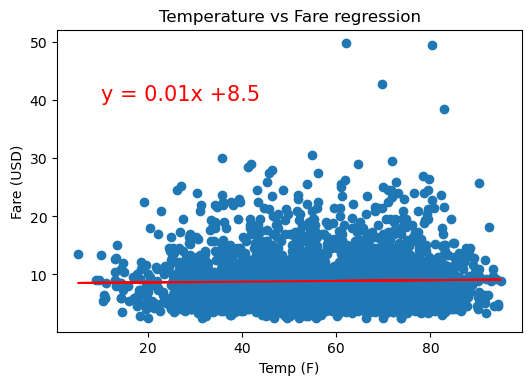

In [13]:
linear_regression(final_data_all_years['Temp'],final_data_all_years['fare_amount'], 10, 40,'Temp (F)', 'Fare (USD)')
plt.rcParams["figure.dpi"] = 100
plt.title('Temperature vs Fare regression')
plt.savefig('Output/1_temp_vs_fare_regression.png')
plt.show()

## Linear Regression Model for temperature vs distance to see if temperature has an effect on uber trip distance
---

The r value is 0.031927
The r-squared value is: 0.001019


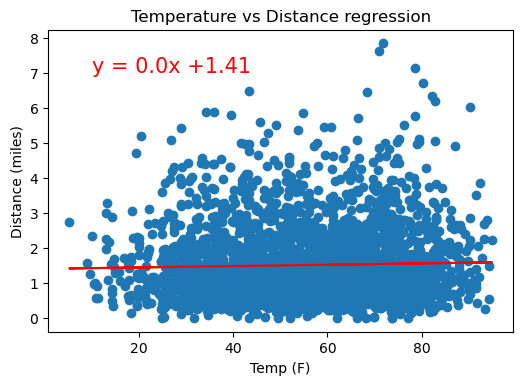

In [14]:
linear_regression(final_data_all_years['Temp'], final_data_all_years['Distance (miles)'], 10, 7, 'Temp (F)','Distance (miles)')
plt.rcParams["figure.dpi"] = 100
plt.title('Temperature vs Distance regression')
plt.savefig('Output/2_temp_vs_dist_regression.png')
plt.show()

### Conclusion: Both regression plots show a very weak relationship between temperature vs fare amount and temperature vs distance. Both r values are lower than 0.1 so the correlations are weak. Temperature does not seem ti have an effect on fare amount or trip distance.
---
---

## Graphs and statistical tests to see if there is any difference in average fare amount customers pay or distance of their uber trips between different temperature ranges
---

### Dual Axis Chart for Average fare amount and average trip distance by temperature interval

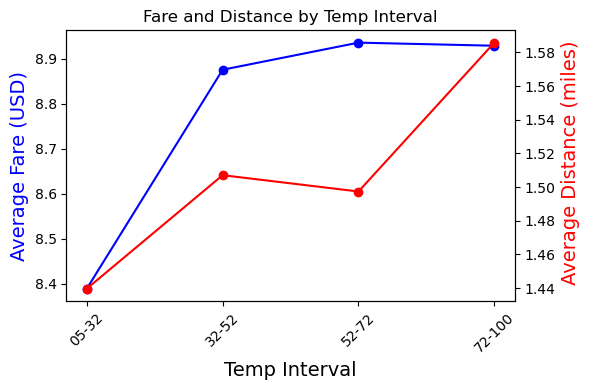

In [15]:
temp_fare_dist = final_data_all_years.groupby('Temp Interval (F)').mean()
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(temp_fare_dist.fare_amount,
        color='b',
        marker="o")
# set x-axis label
ax.set_xlabel("Temp Interval", fontsize = 14)
# set y-axis label
ax.set_ylabel('Average Fare (USD)',
              color='b',
              fontsize=14)
plt.xticks(rotation=45)
# plt.xticks(rotation=45)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(temp_fare_dist["Distance (miles)"],color="red",marker="o")
ax2.set_ylabel(" Average Distance (miles)",color='red', fontsize=14)
plt.title('Fare and Distance by Temp Interval')
plt.tight_layout()
plt.savefig('Output/3_fare_dist_trend_tempinterval.png')
plt.show()

### Bar Graph of Average Fare Amount for Temperature Ranges

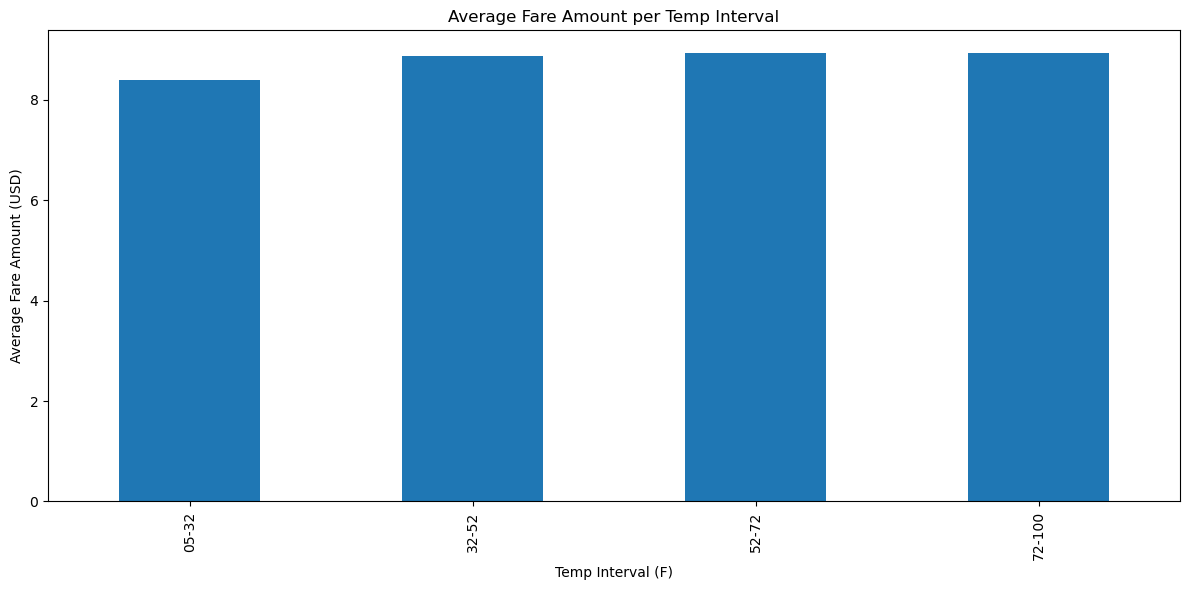

In [16]:
temp_avgfare = final_data_all_years.groupby('Temp Interval (F)').mean()
plt_1 = temp_avgfare['fare_amount'].plot(kind='bar',
                                    figsize=(12,6),
                                    title="Average Fare Amount per Temp Interval")
plt_1.set_xlabel("Temp Interval (F)")
plt_1.set_ylabel("Average Fare Amount (USD)")
plt.tight_layout()
plt.savefig('Output/4_fare_temprange_bargraph.png')

### Boxplot of Fare Amounts for Temperature Ranges

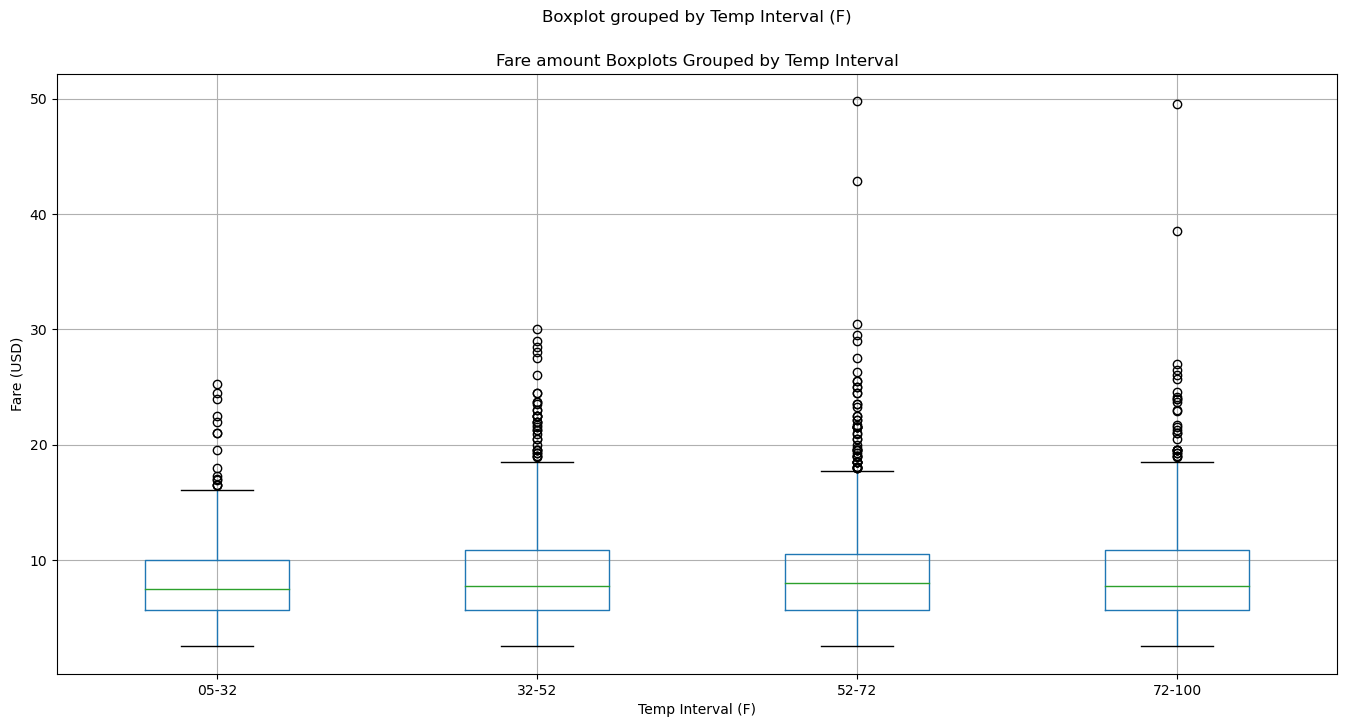

In [17]:
final_data_all_years.boxplot('fare_amount', by='Temp Interval (F)', figsize=(16, 8))
plt.title('Fare amount Boxplots Grouped by Temp Interval')
plt.xlabel('Temp Interval (F)')
plt.ylabel('Fare (USD)')
plt.savefig('Output/5_fare_temprange_boxplot.png')

### Summary Statistics for Fare amount across the Temperature ranges

In [18]:
fare_stats_by_tempinterval = final_data_all_years.groupby('Temp Interval (F)').agg({'fare_amount':['mean', 'median', 'var', 'std', 'sem']})
fare_stats_by_tempinterval

fare_amount                                      
                         mean median        var       std       sem
Temp Interval (F)                                                  
05-32                8.389547    7.5  15.559960  3.944612  0.232843
32-52                8.875217    7.7  19.062889  4.366107  0.143946
52-72                8.935354    8.0  21.368769  4.622637  0.140080
72-100               8.928477    7.7  23.150156  4.811461  0.195776

### Anova Test between average fare amounts across the Temperature Ranges (Null Hypothesis: There is no stastistically significant difference between the average fare amounts for the groups of temperature ranges)

In [19]:
# Extracting temp intervals into different groups
tempgroup_5_32_fare = final_data_all_years[final_data_all_years['Temp Interval (F)'] == '05-32']['fare_amount']
tempgroup_32_52_fare = final_data_all_years[final_data_all_years['Temp Interval (F)'] == '32-52']['fare_amount']
tempgroup_52_72_fare = final_data_all_years[final_data_all_years['Temp Interval (F)'] == '52-72']['fare_amount']
tempgroup_72_100_fare = final_data_all_years[final_data_all_years['Temp Interval (F)'] == '72-100']['fare_amount']

# Anova test to see if any group has a singificantly different average fare amount
stats.f_oneway(tempgroup_5_32_fare, tempgroup_32_52_fare, tempgroup_52_72_fare, tempgroup_72_100_fare)

F_onewayResult(statistic=1.1866870690963987, pvalue=0.31325515667726117)

### Conclusion: Bar Graph shows very similar values for average fare amounts across the temperature intervals, the summary statistics also show mostly close average fare amounts within standard error of each other. Finally with the anova test yielding a p value higher than 0.05, we cannot reject the null hypothesis. Temperature does not seem to have an effect on fare amount customers pay

### Bar Graph of Average Trip Distance for Temperature Ranges

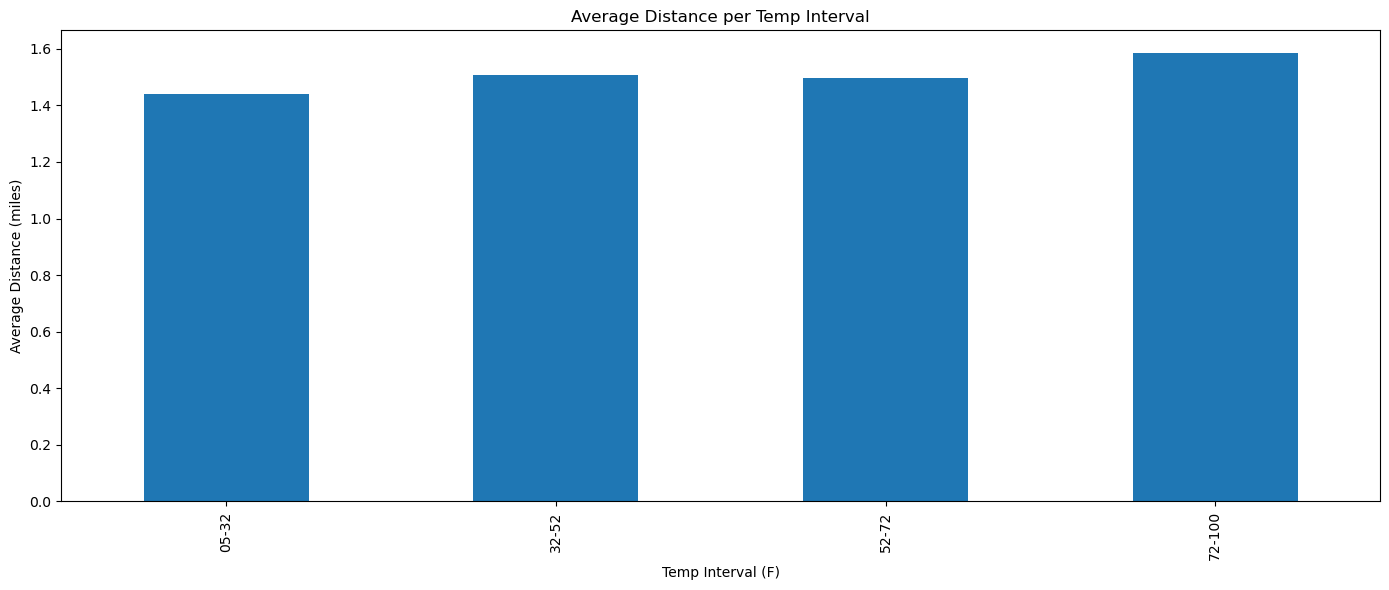

In [20]:
temp_avgdist = final_data_all_years.groupby('Temp Interval (F)').mean()
plt_2 = temp_avgdist['Distance (miles)'].plot(kind='bar',
                                    figsize=(14,6),
                                    title="Average Distance per Temp Interval")
plt_2.set_xlabel("Temp Interval (F)")
plt_2.set_ylabel("Average Distance (miles)")
plt.tight_layout()
plt.savefig('Output/6_dist_temprange_bargraph.png')

### Boxplot of Trip Distances for Temperature Ranges

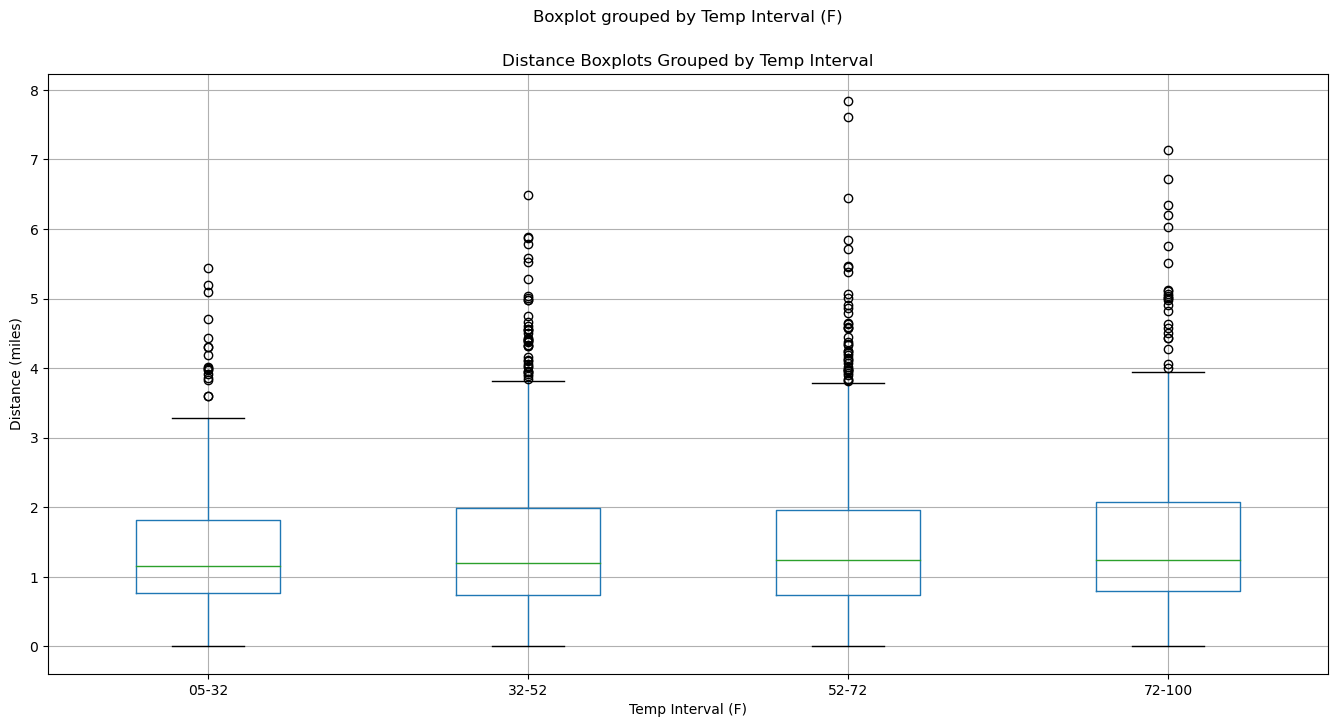

In [21]:
final_data_all_years.boxplot('Distance (miles)', by='Temp Interval (F)', figsize=(16, 8))
plt.title('Distance Boxplots Grouped by Temp Interval')
plt.xlabel('Temp Interval (F)')
plt.ylabel('Distance (miles)')
plt.savefig('Output/7_dist_temprange_boxplot.png')

### Summary Statistics for Trip Distance across the Temperature ranges

In [22]:
distance_stats_by_tempinterval = final_data_all_years.groupby('Temp Interval (F)').agg({'Distance (miles)':['mean', 'median', 'var', 'std', 'sem']})
distance_stats_by_tempinterval

Distance (miles)                                        
                              mean    median       var       std       sem
Temp Interval (F)                                                         
05-32                     1.439683  1.156738  1.008088  1.004036  0.059266
32-52                     1.507090  1.204446  1.111643  1.054345  0.034761
52-72                     1.497403  1.239086  1.061203  1.030147  0.031217
72-100                    1.585807  1.242209  1.276672  1.129899  0.045975

### Anova Test between average trip distances across the Temperature Ranges (Null Hypothesis: There is no stastistically significant difference between the average trip distances for the groups of temperature ranges)

In [23]:
# Extracting temp intervals into different groups
tempgroup_5_32_dist = final_data_all_years[final_data_all_years['Temp Interval (F)'] == '05-32']['Distance (miles)']
tempgroup_32_52_dist = final_data_all_years[final_data_all_years['Temp Interval (F)'] == '32-52']['Distance (miles)']
tempgroup_52_72_dist = final_data_all_years[final_data_all_years['Temp Interval (F)'] == '52-72']['Distance (miles)']
tempgroup_72_100_dist = final_data_all_years[final_data_all_years['Temp Interval (F)'] == '72-100']['Distance (miles)']

# Anova test to see if any group has a singificantly different average trip distance
stats.f_oneway(tempgroup_5_32_dist, tempgroup_32_52_dist, tempgroup_52_72_dist, tempgroup_72_100_dist)

F_onewayResult(statistic=1.504696841779563, pvalue=0.21127971696063655)

### Conclusion: Bar Graph shows very similar values for average trips distance across the temperature intervals, the summary statistics also show mostly close average trip distances within standard error of each other. Finally with the anova test yielding a p value higher than 0.05, we cannot reject the null hypothesis. Temperature does not seem to have an effect on the distance of customers trips
---
---

## 2. Weather Types

## Linear Regression Models for trip distance vs fare amount for various weather types to see if weather type has an effect on uber pricing
---

### Linear regression between distance and fare amount for Clear Weather 

The r value is 0.782568
The r-squared value is: 0.612413


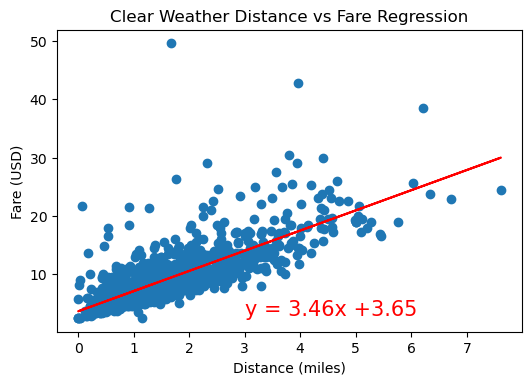

In [25]:
clear_weather = final_data_all_years[final_data_all_years['Weather Main'] == 'Clear']
linear_regression(clear_weather['Distance (miles)'], clear_weather['fare_amount'], 3, 3, 'Distance (miles)', 'Fare (USD)')
plt.title('Clear Weather Distance vs Fare Regression')
plt.savefig('Output/8_clear_fare_dist_regression.png')

### Linear regression between distance and fare amount for Cloudy Weather 

The r value is 0.81599
The r-squared value is: 0.66584


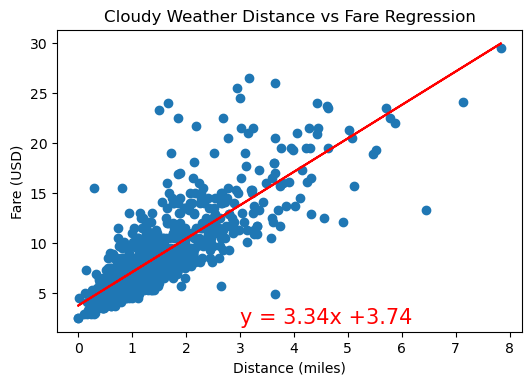

In [26]:
cloudy_weather = final_data_all_years[final_data_all_years['Weather Main'] == 'Clouds']
linear_regression(cloudy_weather['Distance (miles)'], cloudy_weather['fare_amount'], 3, 2, 'Distance (miles)', 'Fare (USD)')
plt.title('Cloudy Weather Distance vs Fare Regression')
plt.savefig('Output/9_cloudy_fare_dist_regression.png')

### Linear regression between distance and fare amount for Rainy Weather 

The r value is 0.824043
The r-squared value is: 0.679047


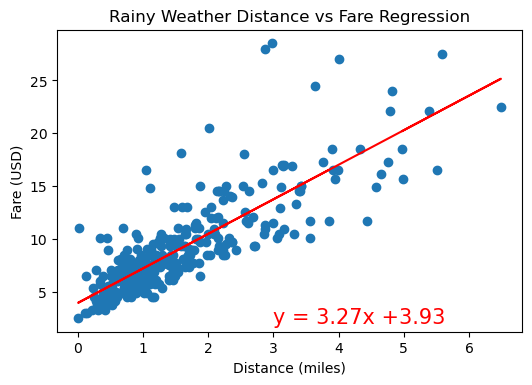

In [27]:
rainy_weather = final_data_all_years[final_data_all_years['Weather Main'] == 'Rain']
linear_regression(rainy_weather['Distance (miles)'], rainy_weather['fare_amount'], 3, 2, 'Distance (miles)', 'Fare (USD)')
plt.title('Rainy Weather Distance vs Fare Regression')
plt.savefig('Output/10_rainy_fare_dist_regression.png')

### Linear regression between distance and fare amount for Snowy Weather

The r value is 0.848203
The r-squared value is: 0.719448


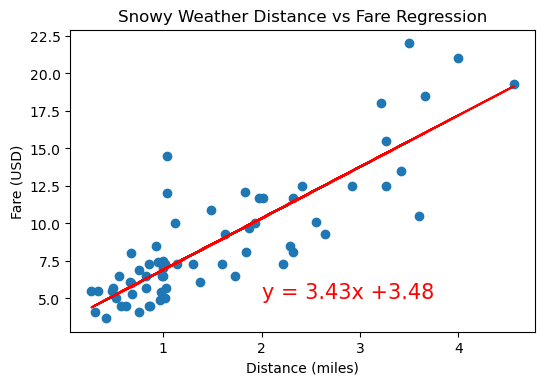

In [28]:
snowy_weather = final_data_all_years[final_data_all_years['Weather Main'] == 'Snow']
linear_regression(snowy_weather['Distance (miles)'], snowy_weather['fare_amount'], 2, 5, 'Distance (miles)', 'Fare (USD)')
plt.title('Snowy Weather Distance vs Fare Regression')
plt.savefig('Output/11_snowy_fare_dist_regression.png')

### Linear regression between distance and fare amount for Misty Weather 

The r value is 0.776485
The r-squared value is: 0.602929


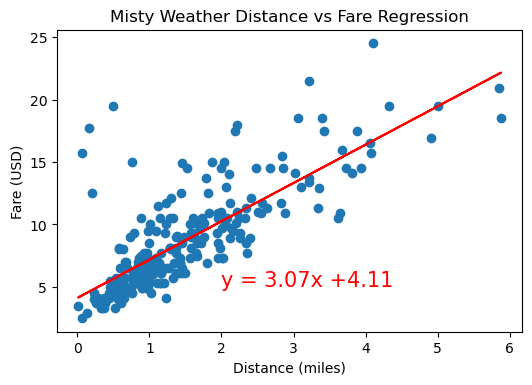

In [29]:
misty_weather = final_data_all_years[final_data_all_years['Weather Main'] == 'Mist']
linear_regression(misty_weather['Distance (miles)'], misty_weather['fare_amount'], 2, 5, 'Distance (miles)', 'Fare (USD)')
plt.title('Misty Weather Distance vs Fare Regression')
plt.savefig('Output/12_misty_fare_dist_regression.png')

### Conclusion: Linear regressions show similar relationship between trip distance and fare amount regardless of weather type. Pricing of uber rides seems to remain stable across differnt weather types
---
---

## Graphs and statistical tests to see if there is any difference in average fare amount customers pay or distance of their uber trips between different weather types
---

### Bar Graph - Average Fare v/s Weather Type

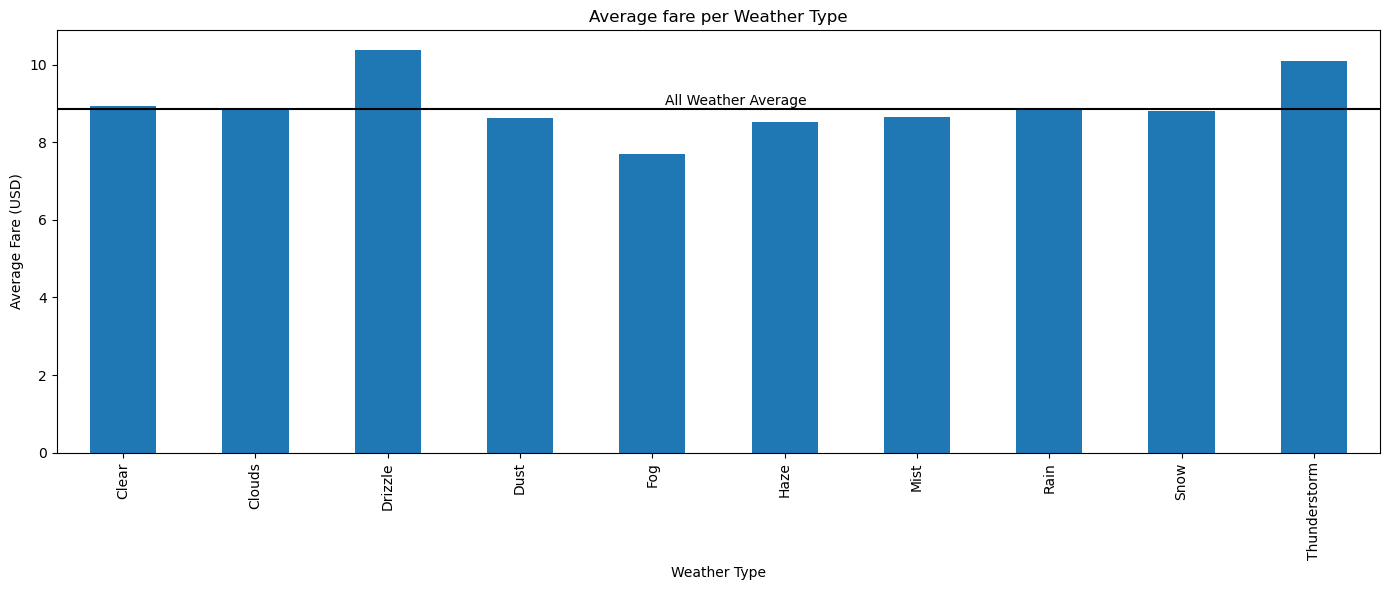

In [30]:
weather_avgfare = final_data_all_years.groupby('Weather Main').mean()
plt_3 = weather_avgfare['fare_amount'].plot(kind='bar',
                                    figsize=(14,6),
                                    title="Average fare per Weather Type")
plt_3.set_xlabel("Weather Type")
plt_3.set_ylabel("Average Fare (USD)")

plt_3.hlines(final_data_all_years['fare_amount'].mean(), -1, 12, alpha=1)
plt_3.text(5.2, final_data_all_years['fare_amount'].mean() + 0.2, 'All Weather Average ', ha='right', va='center')
plt.tight_layout()
plt.savefig('Output/13_fare_wtype_bargraph.png')

### Boxplot - Fare v/s Weather Type

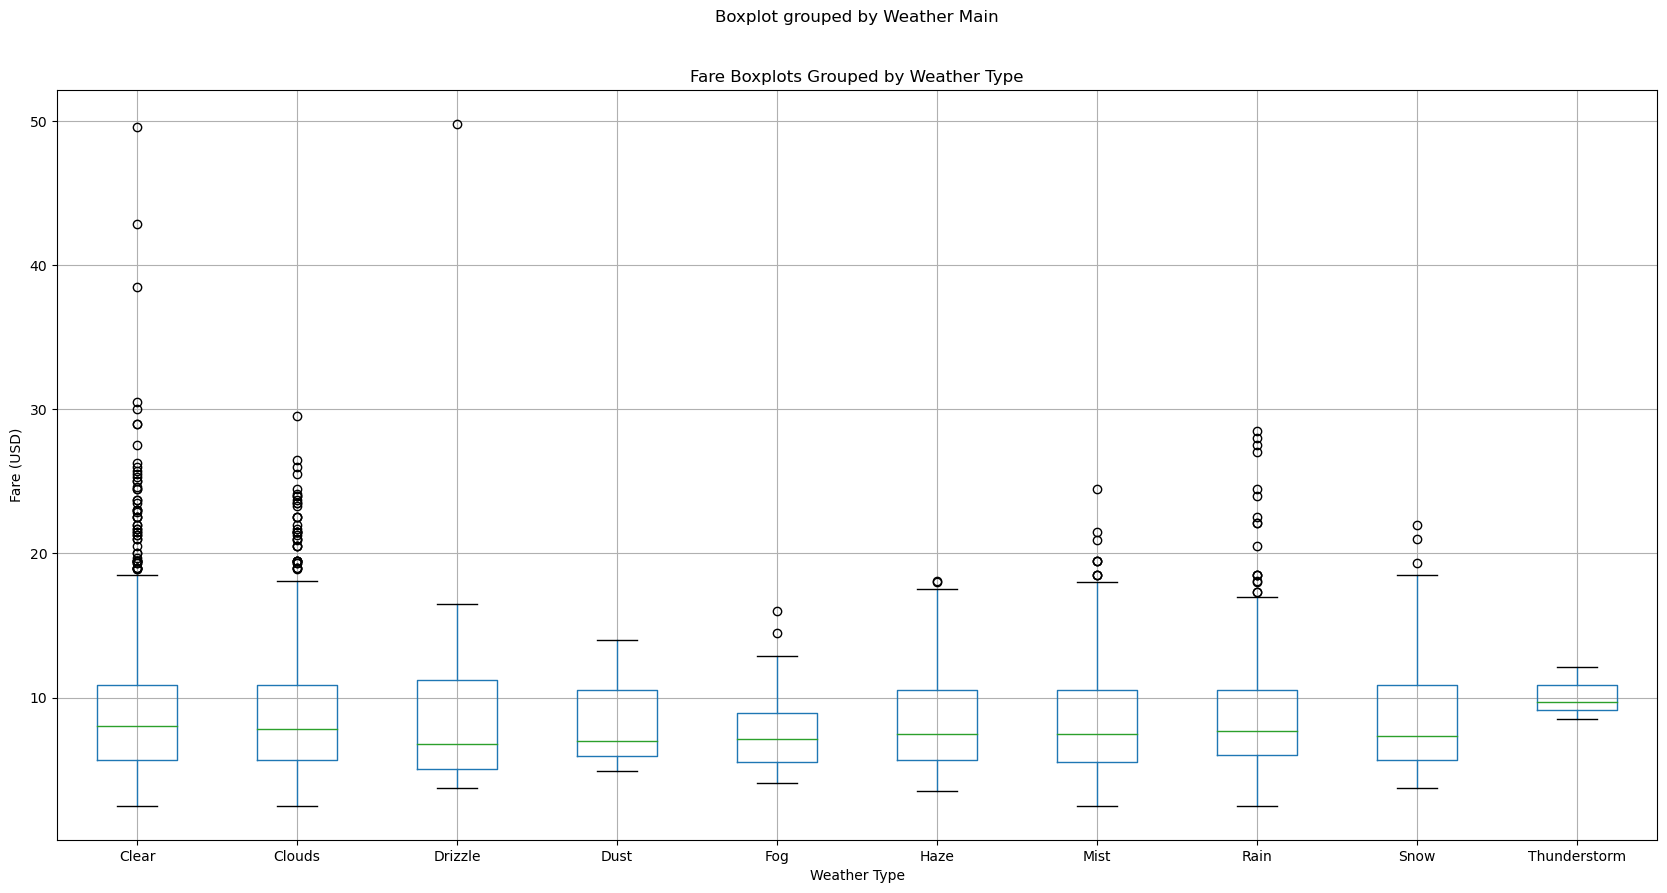

In [31]:
final_data_all_years.boxplot('fare_amount', by='Weather Main', figsize=(20, 10))
plt.title('Fare Boxplots Grouped by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Fare (USD)')
plt.savefig('Output/14_fare_wtype_boxplot')

In [32]:
# Displaying sample sizes for each weather category
final_data_all_years.groupby(['Weather Main']).count()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,date,time,Distance (km),Distance (miles),Time Interval,fare_amount_group,Year,Month,Timestamp,Clouds,Dew Point,Feels Like,Humidity,Pressure,Sunrise,Sunset,Temp,Visibility,Weather Description,Weather Icon,Weather ID,Wind Degree,Wind Speed,Data Rain,Data Snow,Temp Interval (F)
Weather Main,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Clear,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
Clouds,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790,790
Drizzle,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Dust,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Fog,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
Haze,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
Mist,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
Rain,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353
Snow,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65


### Anova test between 5 weather conditions to see if there is statistically significant difference between average fare amount across the weather conditions

In [33]:
# Extracting weathers of choice into different groups
group_clear_fare = final_data_all_years[final_data_all_years['Weather Main'] == 'Clear']['fare_amount']
group_clouds_fare = final_data_all_years[final_data_all_years['Weather Main'] == 'Clouds']['fare_amount']
group_rain_fare = final_data_all_years[final_data_all_years['Weather Main'] == 'Rain']['fare_amount']
group_snow_fare = final_data_all_years[final_data_all_years['Weather Main'] == 'Snow']['fare_amount']
group_mist_fare = final_data_all_years[final_data_all_years['Weather Main'] == 'Mist']['fare_amount']

# Anova test to see if any group has a singificantly different average fare amount
stats.f_oneway(group_clear_fare, group_clouds_fare, group_rain_fare, group_snow_fare, group_mist_fare)

F_onewayResult(statistic=0.2318888614859121, pvalue=0.9205484150801986)

### Conclusion: The p-value is higher than 0.05, there is no statistically significant effect of different weather conditions on average fare amount

### Bar Graph - Average Distance v/s Weather Type

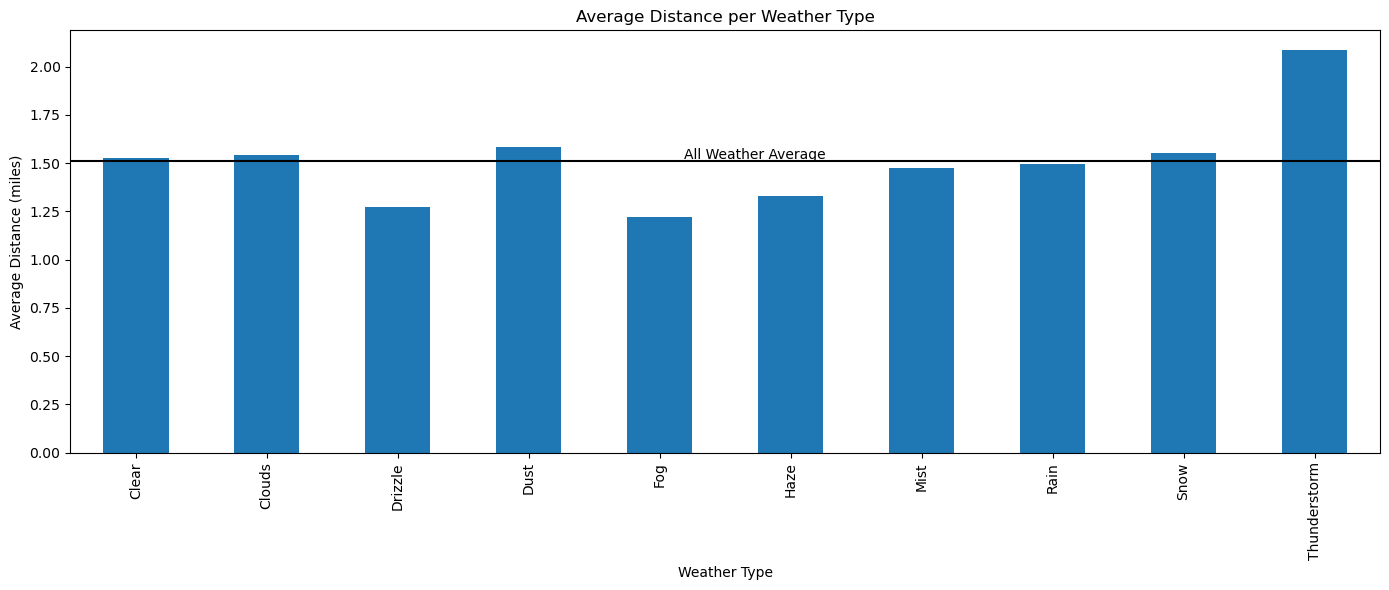

In [34]:
weather_avgdistance = final_data_all_years.groupby('Weather Main').mean()
plt_4 = weather_avgdistance['Distance (miles)'].plot(kind='bar',
                                    figsize=(14,6),
                                    title="Average Distance per Weather Type")
plt_4.set_xlabel("Weather Type")
plt_4.set_ylabel("Average Distance (miles)")

plt_4.hlines(final_data_all_years['Distance (miles)'].mean(), -1, 12, alpha=1)
plt_4.text(5.3, final_data_all_years['Distance (miles)'].mean() + 0.03, 'All Weather Average ', ha='right', va='center')
plt.tight_layout()
plt.savefig('Output/15_dist_wtype_bargraph.png')

### Boxplot - Distance v/s Weather Type

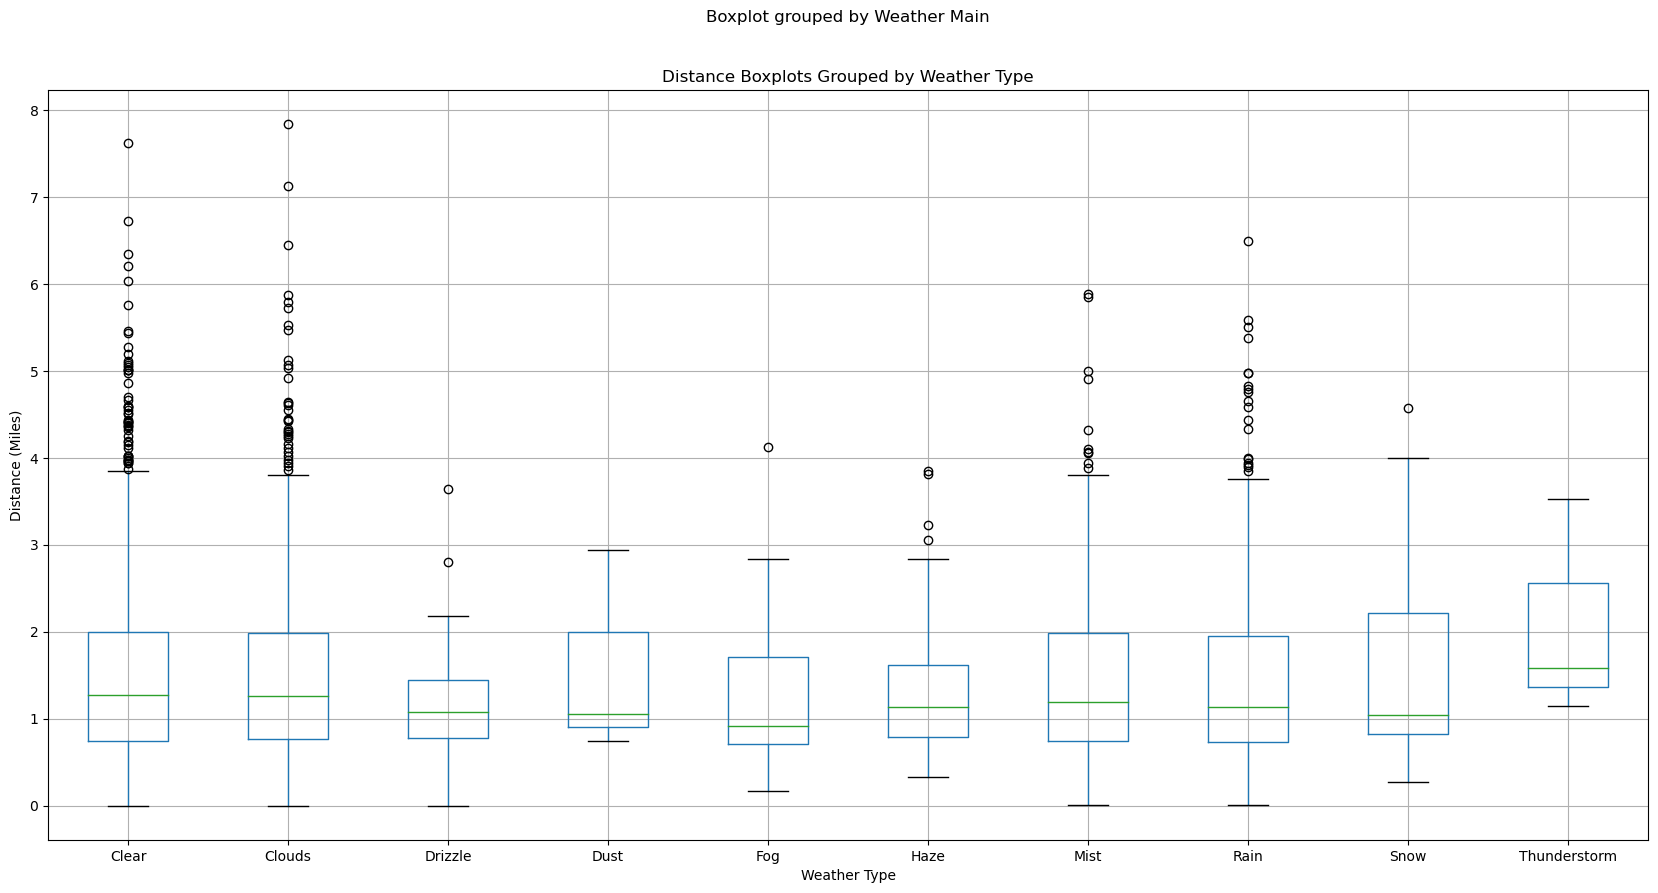

In [35]:
final_data_all_years.boxplot('Distance (miles)', by='Weather Main', figsize=(20, 10))
plt.title('Distance Boxplots Grouped by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Distance (Miles)')
plt.savefig('Output/16_dist_wtype_boxplot.png')

### Anova test between 5 weather conditions to see if there is statistically significant difference between average trip distance across the weather conditions

In [36]:
# Extracting weathers of choice into different groups
group_clear_dist = final_data_all_years[final_data_all_years['Weather Main'] == 'Clear']['Distance (miles)']
group_clouds_dist = final_data_all_years[final_data_all_years['Weather Main'] == 'Clouds']['Distance (miles)']
group_rain_dist = final_data_all_years[final_data_all_years['Weather Main'] == 'Rain']['Distance (miles)']
group_snow_dist = final_data_all_years[final_data_all_years['Weather Main'] == 'Snow']['Distance (miles)']
group_mist_dist = final_data_all_years[final_data_all_years['Weather Main'] == 'Mist']['Distance (miles)']
# Anova test to see if any group has a singificantly different average trip distance 
stats.f_oneway(group_mist_dist, group_clear_dist, group_clouds_dist, group_rain_dist, group_snow_dist)

F_onewayResult(statistic=0.23170836065660327, pvalue=0.9206537006756047)

### Conclusion: The p-value is higher than 0.05, there is no statistically significant effect of different weather conditions on average trip distance
---
---

## 3. Time Interval

### Dual Axis Chart for Average fare amount and average trip distance by time interval

In [37]:
groupby_time = final_data_all_years.groupby('Time Interval').mean()
time_fare_dist = groupby_time[['fare_amount', 'Distance (miles)']]
time_fare_dist.insert(2,'Order',[5,4,8,1,2,6,3,7], True) 
sorted_time_fare_dist = time_fare_dist.sort_values('Order', ascending=True)
sorted_time_fare_dist


,fare_amount,Distance (miles),Order
Time Interval,,,
12 am- 4 am,8.954710,1.737005,1
4 am - 7 am,8.631183,1.736726,2
7 am - 10 am,8.773437,1.459213,3
10 am - 1 pm,9.011529,1.377679,4
1 pm - 5 pm,8.776386,1.422532,5
5 pm - 8 pm,8.682505,1.435316,6
8 pm - 11 pm,8.736901,1.605321,7
11pm - 12 am,9.986190,1.773750,8


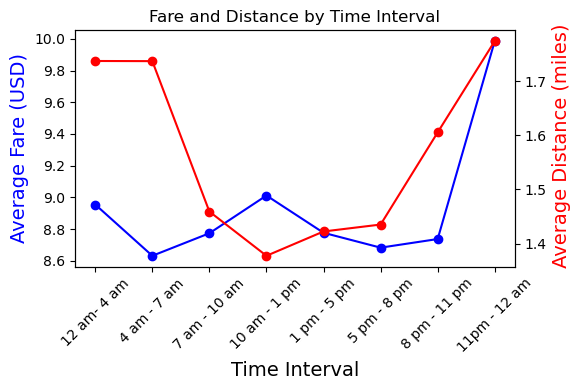

In [40]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(sorted_time_fare_dist.fare_amount,
        color='b',
        marker="o")
# set x-axis label
ax.set_xlabel("Time Interval", fontsize = 14)
# set y-axis label
ax.set_ylabel('Average Fare (USD)',
              color='b',
              fontsize=14)
plt.xticks(rotation=45)
# plt.xticks(rotation=45)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(sorted_time_fare_dist["Distance (miles)"],color="red",marker="o")
ax2.set_ylabel(" Average Distance (miles)",color='red', fontsize=14)
plt.title('Fare and Distance by Time Interval')
plt.tight_layout()
plt.savefig('Output/17_fare_dist_trend_timeinterval.png')
plt.show()

## Bar Graph - Average Fare v/s Time Interval

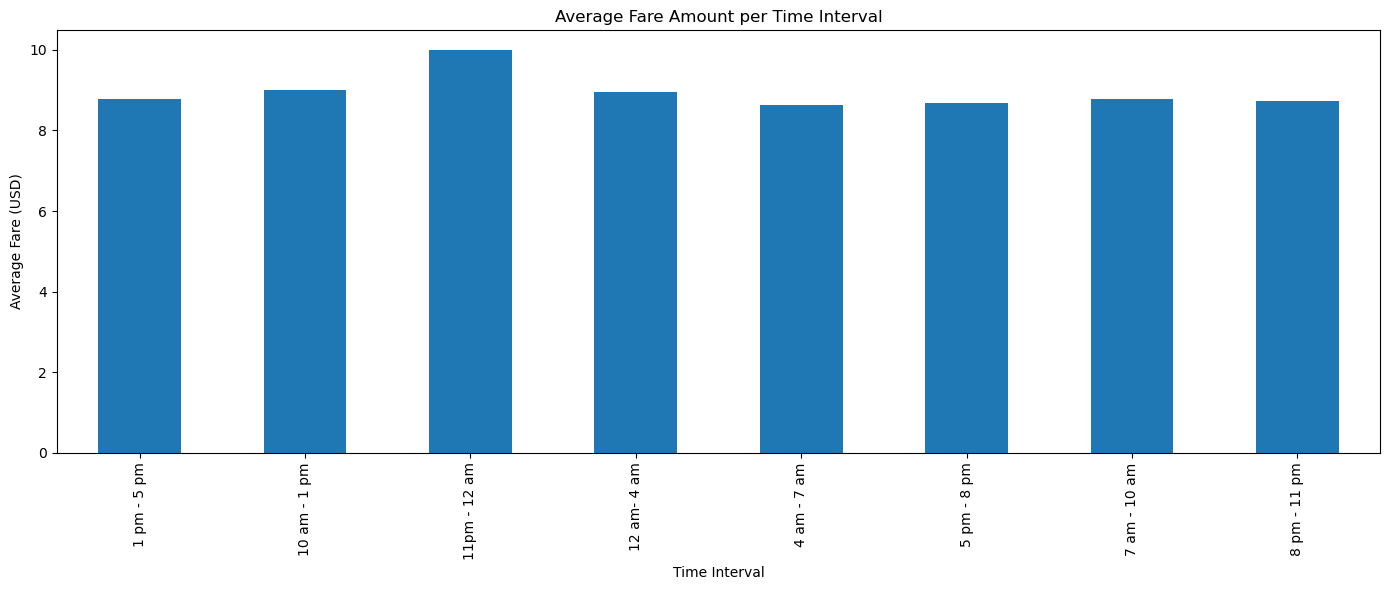

In [41]:
weather_faretimeinterval = final_data_all_years.groupby('Time Interval').mean()
plt_5 = weather_faretimeinterval['fare_amount'].plot(kind='bar',
                                    figsize=(14,6),
                                    title="Average Fare Amount per Time Interval")
plt_5.set_xlabel("Time Interval")
plt_5.set_ylabel("Average Fare (USD)")
plt.tight_layout()
plt.savefig('Output/18_fare_timerange_bargraph.png')

## Boxplot - Fare v/s Time Interval

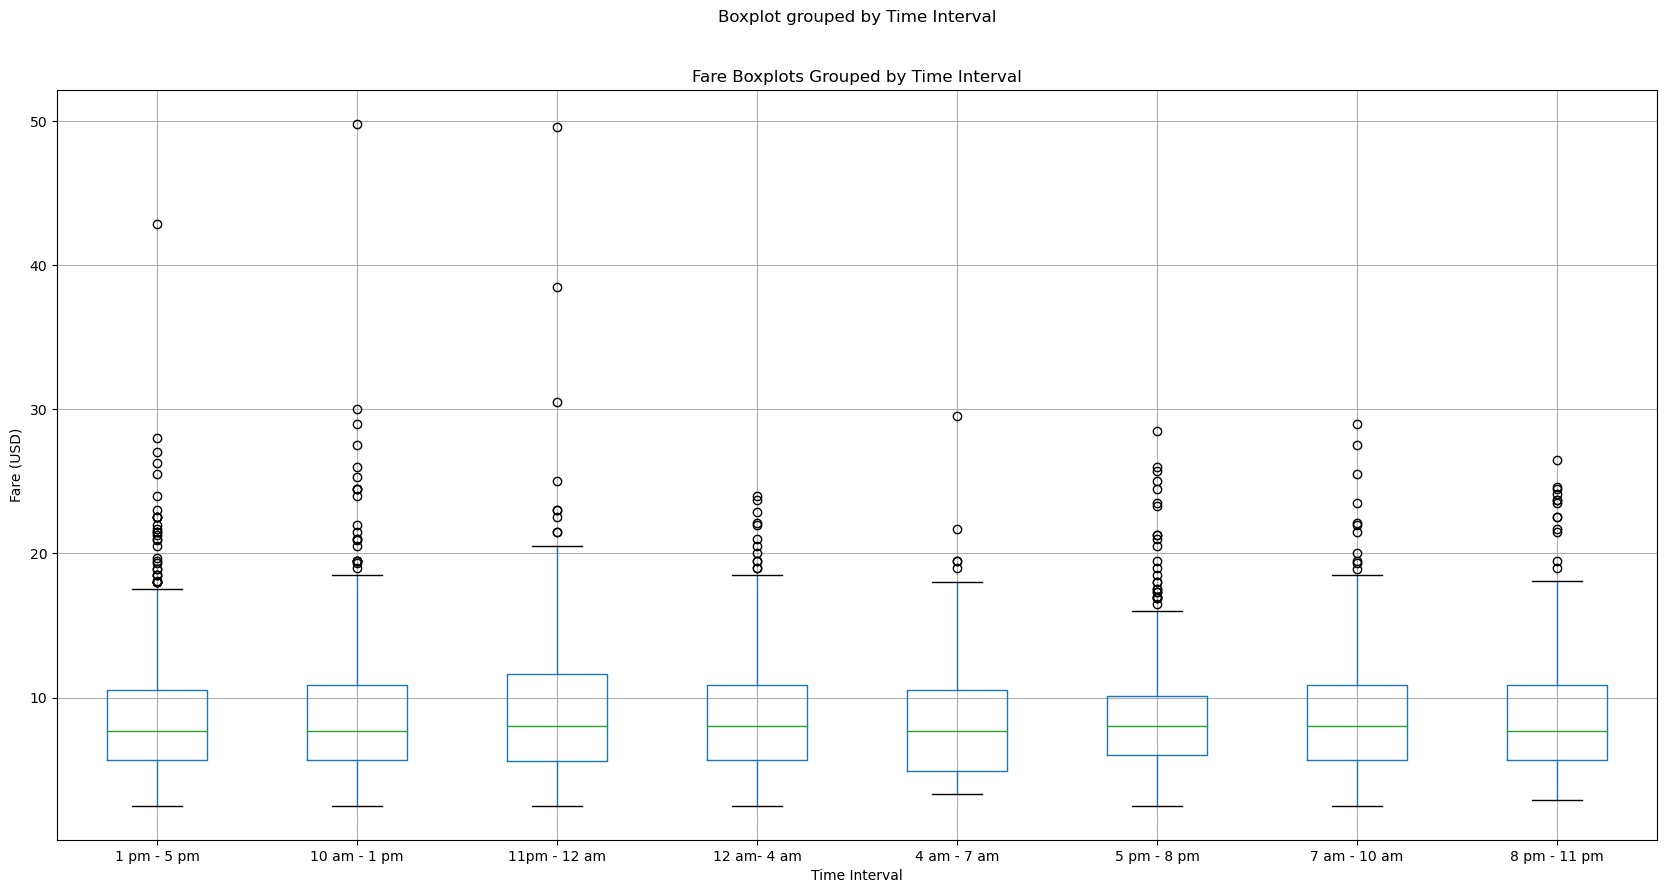

In [42]:
final_data_all_years.boxplot('fare_amount', by='Time Interval', figsize=(20, 10))
plt.title('Fare Boxplots Grouped by Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Fare (USD)')
plt.savefig('Output/19_fare_timerange_boxplot.png')

### Summary Statistics for Fare amount across the Time ranges

In [44]:
fare_stats_by_timeinterval = final_data_all_years.groupby('Time Interval').agg({'fare_amount':['mean', 'median', 'var', 'std', 'sem']})
fare_stats_by_timeinterval

fare_amount                                      
                     mean median        var       std       sem
Time Interval                                                  
1 pm - 5 pm      8.776386    7.7  20.672653  4.546719  0.192306
10 am - 1 pm     9.011529    7.7  25.707909  5.070297  0.245946
11pm - 12 am     9.986190    8.0  44.040116  6.636273  0.547351
12 am- 4 am      8.954710    8.0  18.790487  4.334800  0.260924
4 am - 7 am      8.631183    7.7  21.896300  4.679348  0.485226
5 pm - 8 pm      8.682505    8.0  15.791406  3.973840  0.177185
7 am - 10 am     8.773437    8.0  17.496421  4.182872  0.213456
8 pm - 11 pm     8.736901    7.7  16.290817  4.036188  0.178202

### Anova Test between average fare amounts across the Time Ranges (Null Hypothesis: There is no stastistically significant difference between the average fare amounts for the groups of time ranges)

In [45]:
# Extracting temp intervals into different groups
timegroup_1pm_5pm_fare = final_data_all_years[final_data_all_years['Time Interval'] == '1 pm - 5 pm']['fare_amount']
timegroup_8pm_11pm_fare = final_data_all_years[final_data_all_years['Time Interval'] == '8 pm - 11 pm']['fare_amount']
timegroup_5pm_8pm_fare = final_data_all_years[final_data_all_years['Time Interval'] == '5 pm - 8 pm']['fare_amount']
timegroup_10am_1pm_fare = final_data_all_years[final_data_all_years['Time Interval'] == '10 am - 1 pm']['fare_amount']
timegroup_7am_10am_fare = final_data_all_years[final_data_all_years['Time Interval'] == '7 am - 10 am']['fare_amount']
timegroup_12am_4am_fare = final_data_all_years[final_data_all_years['Time Interval'] == '12 am- 4 am']['fare_amount']
timegroup_11pm_12am_fare = final_data_all_years[final_data_all_years['Time Interval'] == '11pm - 12 am']['fare_amount']
timegroup_4am_7am_fare = final_data_all_years[final_data_all_years['Time Interval'] == '4 am - 7 am']['fare_amount']

# Anova test to see if any group has a singificantly different average fare amount
timegroup_10am_1pm_fare
stats.f_oneway(timegroup_1pm_5pm_fare, timegroup_8pm_11pm_fare, timegroup_5pm_8pm_fare, timegroup_10am_1pm_fare,timegroup_7am_10am_fare,timegroup_12am_4am_fare,timegroup_11pm_12am_fare,timegroup_4am_7am_fare)


F_onewayResult(statistic=1.637745752424545, pvalue=0.12010364321179909)

### Conclusion: Bar Graph shows very similar values for average fare amounts across the time intervals, the summary statistics also show mostly close average fare amounts within standard error of each other. Finally with the anova test yielding a p value higher than 0.05, we cannot reject the null hypothesis. Time interval does not seem to have an effect on fare amount customers pay

## Bar Graph - Average Distance v/s Time Interval

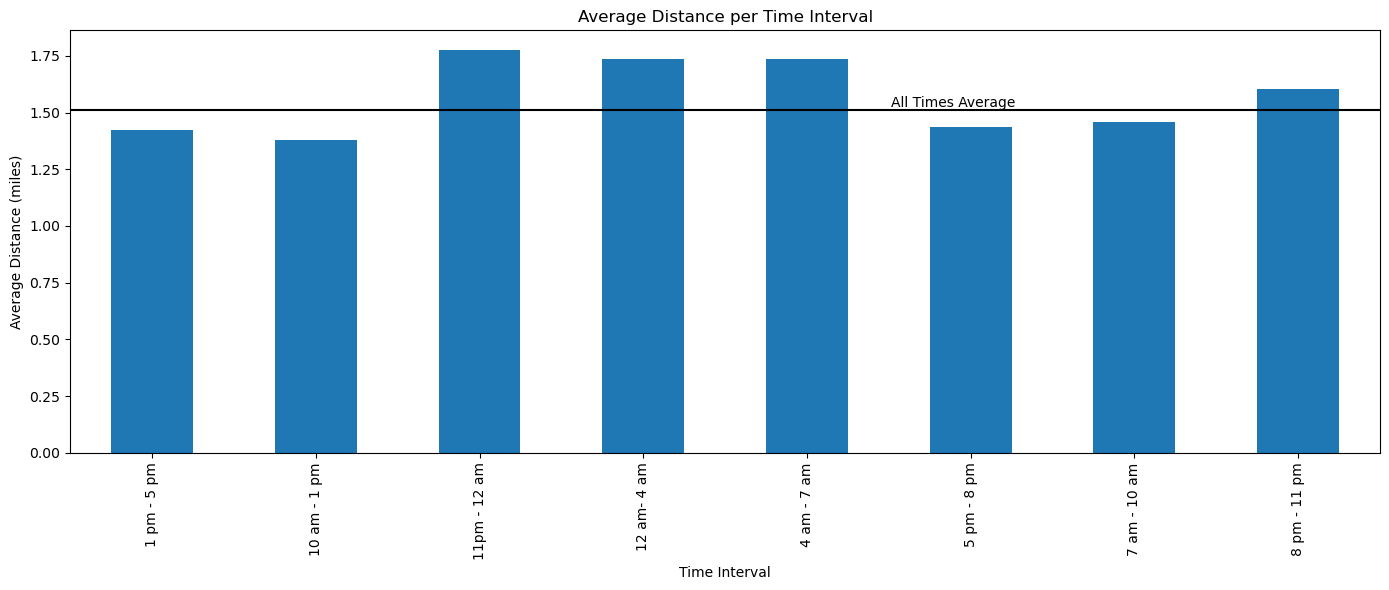

In [46]:
weather_faretimeinterval = final_data_all_years.groupby('Time Interval').mean()
plt_6 = weather_faretimeinterval['Distance (miles)'].plot(kind='bar',
                                    figsize=(14,6),
                                    title="Average Distance per Time Interval")
plt_6.set_xlabel("Time Interval")
plt_6.set_ylabel("Average Distance (miles)")
plt_6.hlines(final_data_all_years['Distance (miles)'].mean(), -1, 12, alpha=1)
plt_6.text(5.3, final_data_all_years['Distance (miles)'].mean() + 0.03, 'All Times Average ', ha='right', va='center')
plt.tight_layout()
plt.savefig('Output/20_dist_timerange_bargraph.png')

## Boxplot - Distance v/s Time Interval

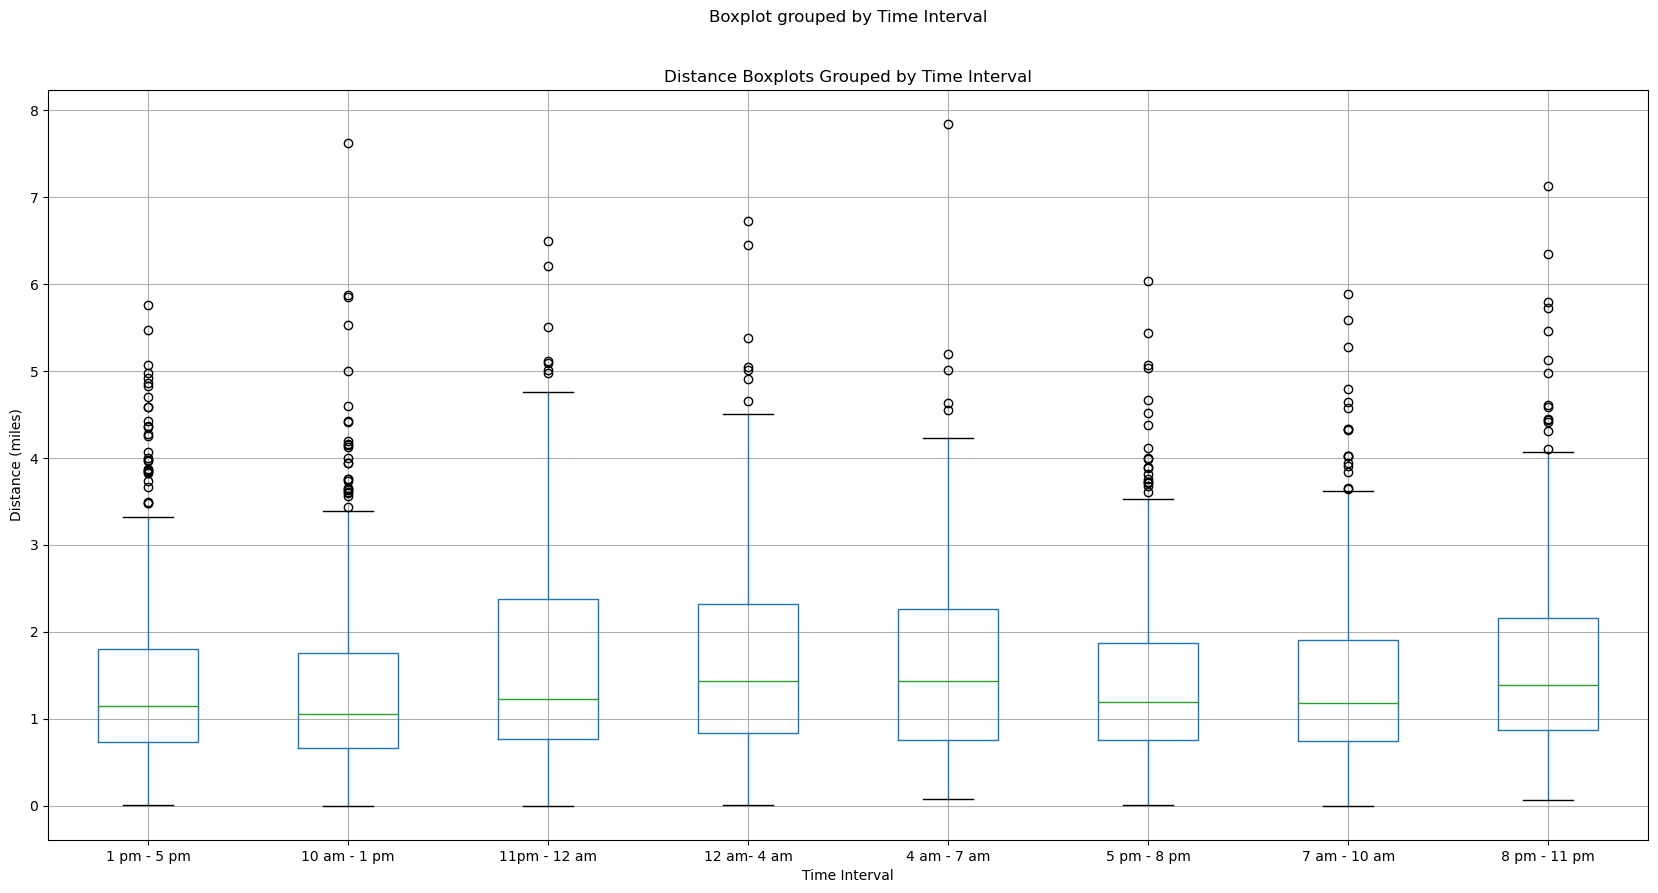

In [47]:
final_data_all_years.boxplot('Distance (miles)', by='Time Interval', figsize=(20, 10))
plt.title('Distance Boxplots Grouped by Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Distance (miles)')
plt.savefig('Output/21_dist_timerange_boxplot.png')

### Summary Statistics for trip distance across the Time ranges

In [48]:
dist_stats_by_timeinterval = final_data_all_years.groupby('Time Interval').agg({'Distance (miles)':['mean', 'median', 'var', 'std', 'sem']})
dist_stats_by_timeinterval

Distance (miles)                                        
                          mean    median       var       std       sem
Time Interval                                                         
1 pm - 5 pm           1.422532  1.150426  0.958035  0.978793  0.041399
10 am - 1 pm          1.377679  1.052284  1.101218  1.049389  0.050903
11pm - 12 am          1.773750  1.221886  1.813653  1.346719  0.111076
12 am- 4 am           1.737005  1.438890  1.462140  1.209190  0.072785
4 am - 7 am           1.736726  1.434547  1.729746  1.315198  0.136380
5 pm - 8 pm           1.435316  1.192280  0.873469  0.934596  0.041672
7 am - 10 am          1.459213  1.175750  0.978417  0.989150  0.050477
8 pm - 11 pm          1.605321  1.387271  1.072788  1.035755  0.045730

### Anova Test between average trip distances across the Time Ranges (Null Hypothesis: There is no stastistically significant difference between the average trip distances for the groups of time ranges)

In [220]:
# Extracting temp intervals into different groups
timegroup_1pm_5pm_dist = final_data_all_years[final_data_all_years['Time Interval'] == '1 pm - 5 pm']['Distance (miles)']
timegroup_8pm_11pm_dist = final_data_all_years[final_data_all_years['Time Interval'] == '8 pm - 11 pm']['Distance (miles)']
timegroup_5pm_8pm_dist = final_data_all_years[final_data_all_years['Time Interval'] == '5 pm - 8 pm']['Distance (miles)']
timegroup_10am_1pm_dist = final_data_all_years[final_data_all_years['Time Interval'] == '10 am - 1 pm']['Distance (miles)']
timegroup_7am_10am_dist = final_data_all_years[final_data_all_years['Time Interval'] == '7 am - 10 am']['Distance (miles)']
timegroup_12am_4am_dist = final_data_all_years[final_data_all_years['Time Interval'] == '12 am- 4 am']['Distance (miles)']
timegroup_11pm_12am_dist = final_data_all_years[final_data_all_years['Time Interval'] == '11pm - 12 am']['Distance (miles)']
timegroup_4am_7am_dist = final_data_all_years[final_data_all_years['Time Interval'] == '4 am - 7 am']['Distance (miles)']

# Anova test to see if any group has a singificantly different average fare amount
stats.f_oneway(timegroup_1pm_5pm_dist, timegroup_8pm_11pm_dist, timegroup_5pm_8pm_dist, timegroup_10am_1pm_dist,timegroup_7am_10am_dist,timegroup_12am_4am_dist,timegroup_11pm_12am_dist,timegroup_4am_7am_dist)

F_onewayResult(statistic=6.394665099375804, pvalue=1.7421059397988162e-07)

In [221]:
population = final_data_all_years["Distance (miles)"]

In [222]:
stats.ttest_1samp(timegroup_1pm_5pm_dist, population.mean())

Ttest_1sampResult(statistic=-2.1895399269150793, pvalue=0.02897100526361652)

In [223]:
stats.ttest_1samp(timegroup_8pm_11pm_dist, population.mean())

Ttest_1sampResult(statistic=2.0149943744660916, pvalue=0.04442741902430312)

In [224]:
# Not unique
stats.ttest_1samp(timegroup_5pm_8pm_dist, population.mean())

Ttest_1sampResult(statistic=-1.8684320858159806, pvalue=0.062284111820083164)

In [225]:
stats.ttest_1samp(timegroup_10am_1pm_dist, population.mean())

Ttest_1sampResult(statistic=-2.6618831700786436, pvalue=0.008065836242446764)

In [226]:
# Not Unique
stats.ttest_1samp(timegroup_7am_10am_dist, population.mean())

Ttest_1sampResult(statistic=-1.0690463442867748, pvalue=0.2857220854637986)

In [227]:
stats.ttest_1samp(timegroup_12am_4am_dist, population.mean())

Ttest_1sampResult(statistic=3.075222742112403, pvalue=0.002315204629379743)

In [228]:
stats.ttest_1samp(timegroup_11pm_12am_dist, population.mean())

Ttest_1sampResult(statistic=2.3459149786647675, pvalue=0.020325499948577345)

In [229]:
# Not unique
stats.ttest_1samp(timegroup_4am_7am_dist, population.mean())

Ttest_1sampResult(statistic=1.6391718443157155, pvalue=0.10459284821680466)

### Conclusion: All time groups had a statistically significant difference in average distance from the population data set, except time groups 4am-7am, 7am-10am and 5pm-8pm. Time of day does have an effect on the average trip distance for certain time intervals